In [1]:
from src.standartization import Standartization
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, MaxPooling2D, Activation,Dense
from tensorflow.keras import Sequential
import tensorflow as tf

# Fazendo o dataset de treino  e teste

In [2]:
standart = Standartization('Dataset')

In [92]:
#dataset = standart.__getAllImages__()
#dataset = standart.__getAllImagesRemovedBackground__()
dataset = standart.__getAllImagesCor_gamma__()

In [93]:
imagens = dataset['images']
labels = dataset['labels']

In [94]:
#labels = keras.utils.to_categorical(labels,num_classes=4)

In [95]:
#labels.shape

In [96]:
X_train, X_test, y_train, y_test = train_test_split(imagens,labels,test_size=0.2)

In [97]:
X_train.shape

(336, 224, 224, 3)

In [98]:
X_test.shape

(85, 224, 224, 3)

In [99]:
y_train.shape

(336,)

# Construção do modelo

In [100]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [102]:
epochs = 10
batch_size = 32

## Modelo Squad

In [35]:
#model_file = os.path.join(output_path,model_name)
model = Sequential()
model.add(Conv2D(512, kernel_size=(3, 3), input_shape=X_train.shape[1:],padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(256, kernel_size=(3,3),padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=(3, 3),padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 512)     14336     
_________________________________________________________________
activation_4 (Activation)    (None, 224, 224, 512)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 512)     0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 112, 112, 512)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 256)     1179904   
_________________________________________________________________
activation_5 (Activation)    (None, 112, 112, 256)     0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 256)      

In [36]:
with tf.device('CPU'):
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size = batch_size,
                        validation_split=0.1)

Epoch 1/10
10/10 [==============================] - 136s 14s/step - loss: 206.1802 - sparse_categorical_accuracy: 0.3146 - val_loss: 1.0669 - val_sparse_categorical_accuracy: 0.6765
Epoch 2/10
10/10 [==============================] - 137s 14s/step - loss: 0.4931 - sparse_categorical_accuracy: 0.8079 - val_loss: 0.5353 - val_sparse_categorical_accuracy: 0.8235
Epoch 3/10
10/10 [==============================] - 138s 14s/step - loss: 0.1051 - sparse_categorical_accuracy: 0.9536 - val_loss: 0.0275 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 133s 13s/step - loss: 0.0431 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.0418 - val_sparse_categorical_accuracy: 0.9706
Epoch 5/10
10/10 [==============================] - 136s 14s/step - loss: 0.0135 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0021 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 132s 13s/step - loss: 0.0015 - sparse_categori

In [37]:
with tf.device('CPU'):
    y_pred = model.predict(X_test)

In [39]:
y_pred = y_pred.argmax(1)

In [40]:
y_test

array([3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 1, 3, 2, 3, 1, 3, 3, 2, 0, 2,
       3, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 3, 1, 2, 0, 1, 0, 0,
       2, 3, 3, 2, 1, 0, 0, 2, 0, 3, 0, 2, 1, 1, 1, 0, 3, 0, 2, 2, 2, 3,
       2, 1, 2, 2, 3, 1, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3])

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [18]:
#model.save('squad_model.h5')

In [43]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0,  0],
       [ 0, 22,  0,  0],
       [ 0,  0, 26,  0],
       [ 0,  0,  0, 22]])

In [44]:
np.mean(recall_score(y_test,y_pred,average=None))

1.0

In [45]:
np.mean(precision_score(y_test,y_pred,average=None))

1.0

In [47]:
values_loss_train = history.history['loss']
values_loss_validation = history.history['val_loss']
values_accuracy_train = history.history['sparse_categorical_accuracy']
values_accuracy_validation = history.history['val_sparse_categorical_accuracy']

x = range(epochs)

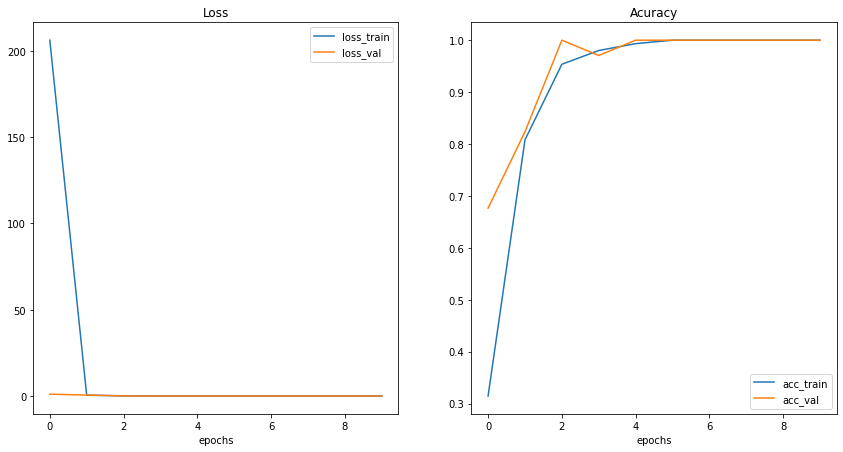

In [48]:
fig = plt.figure(figsize=(14.4,7.2))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,values_loss_train,label='loss_train')
ax1.plot(x,values_loss_validation,label = 'loss_val')
ax1.set_title('Loss')
ax1.set_xlabel('epochs')
ax1.legend(loc='best')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,values_accuracy_train,label='acc_train')
ax2.plot(x,values_accuracy_validation,label = 'acc_val')
ax2.set_title('Acuracy')
ax2.set_xlabel('epochs')
ax2.legend(loc='best')




# Modelo Transfer Learning

In [103]:
vgg = keras.applications.vgg16.VGG16(include_top=False, input_shape=(224,224,3), weights = 'imagenet' )

x = vgg.output
x = Flatten()(x)
x = Dense(4)(x)
out = Activation('softmax')(x)

model_tl = keras.Model(inputs=vgg.input,outputs=out)

In [104]:
model_tl.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [105]:
model_tl.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])

In [106]:
with tf.device('CPU'):
    history_tl = model_tl.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size = batch_size,
                        validation_split=0.1)
    

Epoch 1/10
10/10 [==============================] - 110s 11s/step - loss: 58.2656 - sparse_categorical_accuracy: 0.2351 - val_loss: 2.0282 - val_sparse_categorical_accuracy: 0.2059
Epoch 2/10
10/10 [==============================] - 109s 11s/step - loss: 1.3302 - sparse_categorical_accuracy: 0.3576 - val_loss: 2.6758 - val_sparse_categorical_accuracy: 0.1765
Epoch 3/10
10/10 [==============================] - 109s 11s/step - loss: 1.0130 - sparse_categorical_accuracy: 0.6093 - val_loss: 0.4598 - val_sparse_categorical_accuracy: 0.8529
Epoch 4/10
10/10 [==============================] - 109s 11s/step - loss: 0.5332 - sparse_categorical_accuracy: 0.8212 - val_loss: 0.3536 - val_sparse_categorical_accuracy: 0.7647
Epoch 5/10
10/10 [==============================] - 109s 11s/step - loss: 0.2197 - sparse_categorical_accuracy: 0.9205 - val_loss: 0.2049 - val_sparse_categorical_accuracy: 0.9412
Epoch 6/10
10/10 [==============================] - 109s 11s/step - loss: 0.1096 - sparse_categoric

In [107]:
with tf.device('CPU'):
    y_pred = model_tl.predict(X_test)

In [108]:
y_pred = y_pred.argmax(1)

In [109]:
y_pred

array([1, 2, 2, 3, 2, 1, 0, 1, 1, 1, 3, 2, 1, 2, 1, 3, 0, 0, 1, 2, 2, 2,
       3, 0, 1, 0, 0, 3, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 3, 3, 1,
       1, 1, 1, 2, 2, 3, 3, 1, 0, 2, 0, 2, 3, 1, 1, 2, 1, 2, 0, 2, 3, 0,
       0, 0, 0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 2, 0, 0, 1, 3, 2, 1])

In [110]:
y_test

array([1, 2, 2, 3, 2, 1, 0, 1, 1, 1, 3, 2, 1, 2, 1, 3, 0, 0, 1, 2, 2, 2,
       3, 0, 1, 0, 0, 3, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 3, 1,
       1, 0, 1, 2, 2, 3, 3, 1, 0, 2, 0, 2, 3, 1, 1, 2, 1, 2, 0, 2, 3, 0,
       0, 0, 0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 2, 0, 0, 1, 3, 2, 1])

In [111]:
accuracy_score(y_test,y_pred)

0.9764705882352941

In [112]:
np.mean(precision_score(y_test,y_pred,average=None))

0.974404761904762

In [113]:
np.mean(recall_score(y_test,y_pred,average=None))

0.9782608695652174

In [114]:
confusion_matrix(y_test,y_pred)

array([[21,  1,  0,  1],
       [ 0, 27,  0,  0],
       [ 0,  0, 21,  0],
       [ 0,  0,  0, 14]])

In [115]:
values_loss_train = history_tl.history['loss']
values_loss_validation = history_tl.history['val_loss']
values_accuracy_train = history_tl.history['sparse_categorical_accuracy']
values_accuracy_validation = history_tl.history['val_sparse_categorical_accuracy']

x = range(epochs)

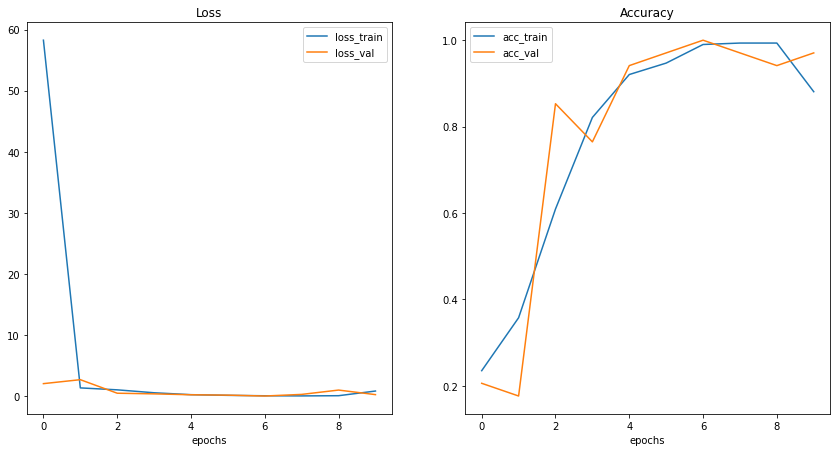

In [117]:
fig = plt.figure(figsize=(14.4,7.2))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,values_loss_train,label='loss_train')
ax1.plot(x,values_loss_validation,label = 'loss_val')
ax1.set_title('Loss')
ax1.set_xlabel('epochs')
ax1.legend(loc='best')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,values_accuracy_train,label='acc_train')
ax2.plot(x,values_accuracy_validation,label = 'acc_val')
ax2.set_title('Accuracy')
ax2.set_xlabel('epochs')
ax2.legend(loc='best')



In [118]:
fig.savefig('VGG16 imagens gamma.png')

<AxesSubplot:>

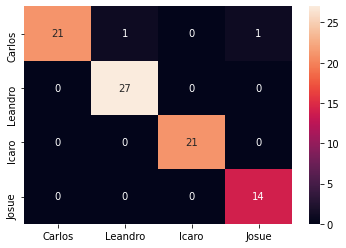

In [119]:
df = pd.DataFrame(confusion_matrix(y_test,y_pred),index=['Carlos','Leandro','Icaro','Josue'],
                  columns=['Carlos','Leandro','Icaro','Josue'])
sns.heatmap(df,annot=True)